# ✮ import necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from PIL import Image
import requests
from io import BytesIO

%matplotlib inline
import matplotlib.image as img

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# ✮ Dataset

In [2]:
#!gdown --id 1YyVCvvWy6tjF3FwhwdLCgr4vrpkdV2c4
california_housing_df=pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

California Housing Dataset 1990

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. 

This dataset was obtained from the kaggle repository:
    https://www.kaggle.com/datasets/camnugent/california-housing-prices?select=housing.csv
    
Attribute Information:
*    1. longitude: A measure of how far west a house is; a higher value is farther west
*    2. latitude: A measure of how far north a house is; a higher value is farther north
*    3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
*    4. totalRooms: Total number of rooms within a block
*    5. totalBedrooms: Total number of bedrooms within a block
*    6. population: Total number of people residing within a block
*    7. households: Total number of households, a group of people residing within a home unit, for a block
*    8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
*    9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
*    10. oceanProximity: Location of the house w.r.t ocean/sea

In [3]:
california_housing_df.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
print('number of features: %i \nnumber of records: %i'%(california_housing_df.shape[1],california_housing_df.shape[0]))

number of features: 10 
number of records: 20640


In [5]:
california_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#find categorical features
unic_values=[]
columns=california_housing_df.columns
for i in range(california_housing_df.shape[1]):
    unic_values.append(california_housing_df[columns[i]].nunique())

categorical_features_df=pd.DataFrame(pd.Series(unic_values,index=columns),columns=['Unic Values']).sort_values(by='Unic Values')
categorical_features_df[categorical_features_df['Unic Values']<60]


Unic Values
ocean_proximity               5
housing_median_age           52

In [7]:
#find numerical features
numerical_features=california_housing_df.select_dtypes(include=[np.number])
print(f'this dataset have {numerical_features.shape[1]} numerical features :')
numerical_features.dtypes


this dataset have 9 numerical features :


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [8]:
california_housing_df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# ✮EDA

Now let's Find the most effective features on the label and plot the pairwise correlation on data

In [9]:
numerical_features.corr()['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

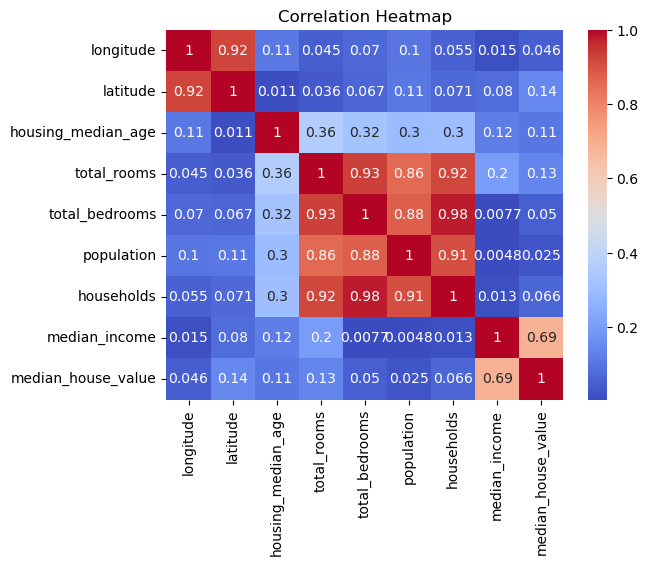

In [10]:
sns.heatmap(numerical_features.corr().abs(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 640x480 with 0 Axes>

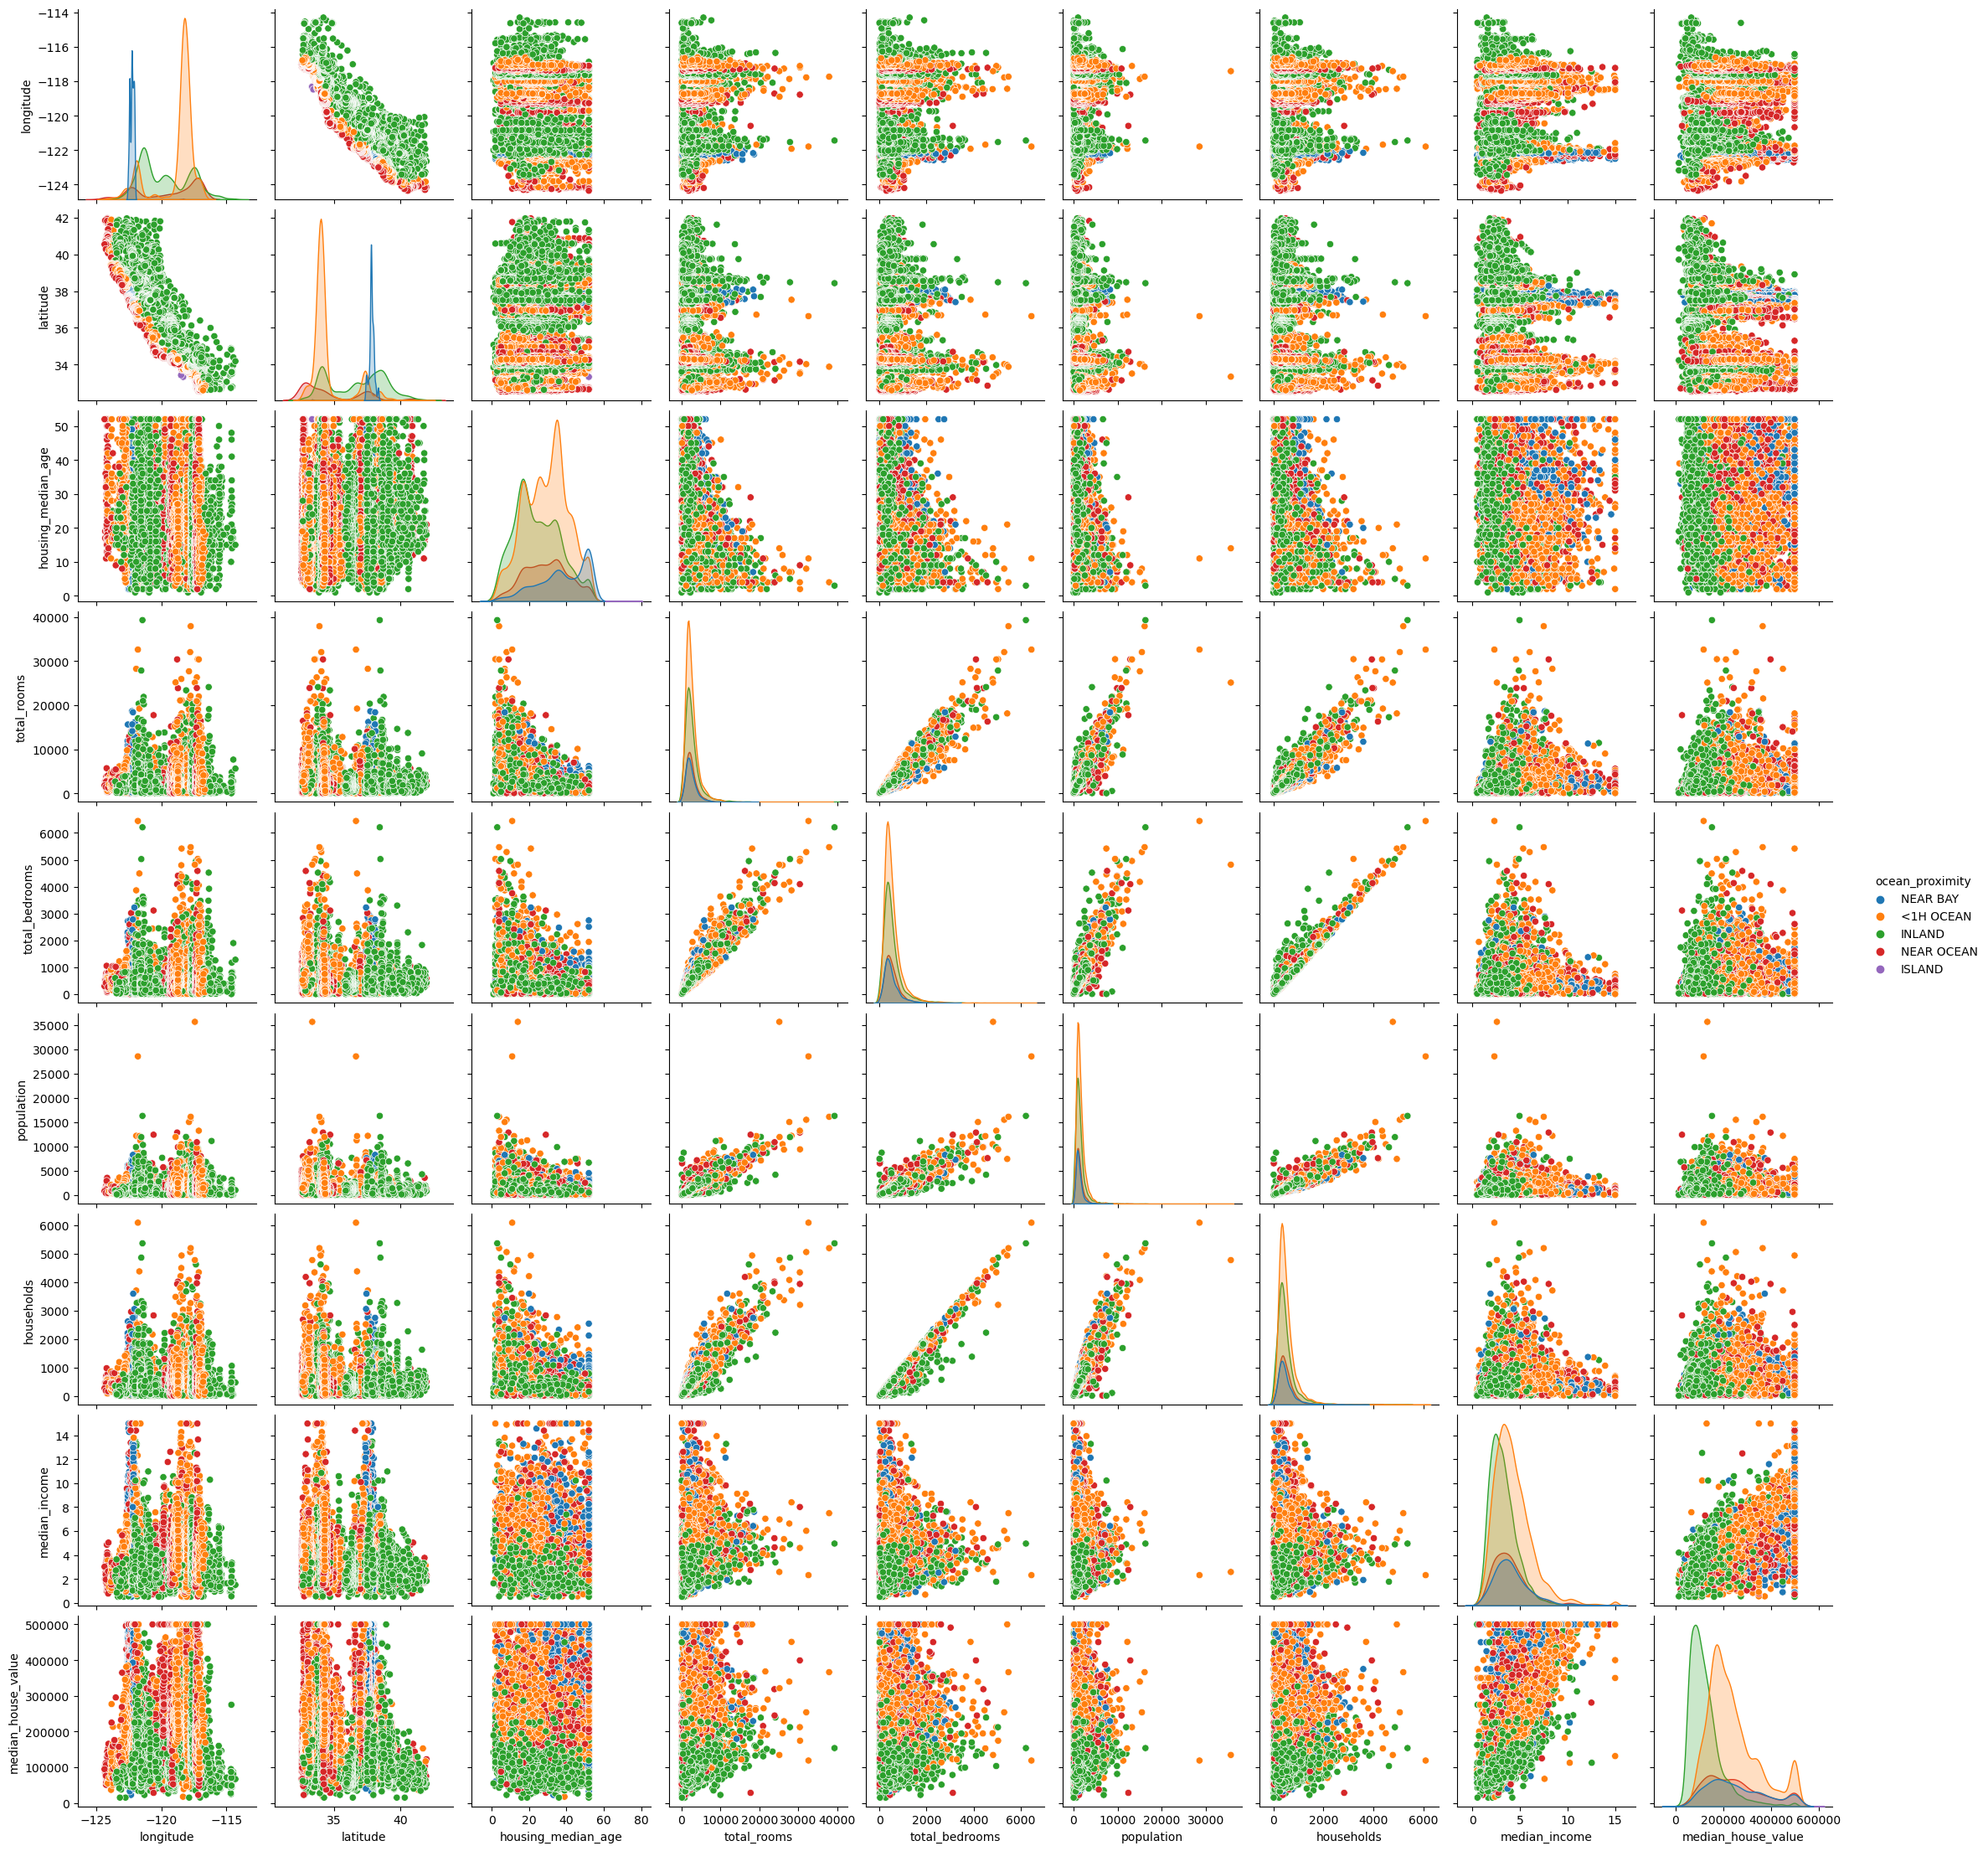

In [11]:
plt.figure()
sns.pairplot(california_housing_df,hue='ocean_proximity')
plt.show()

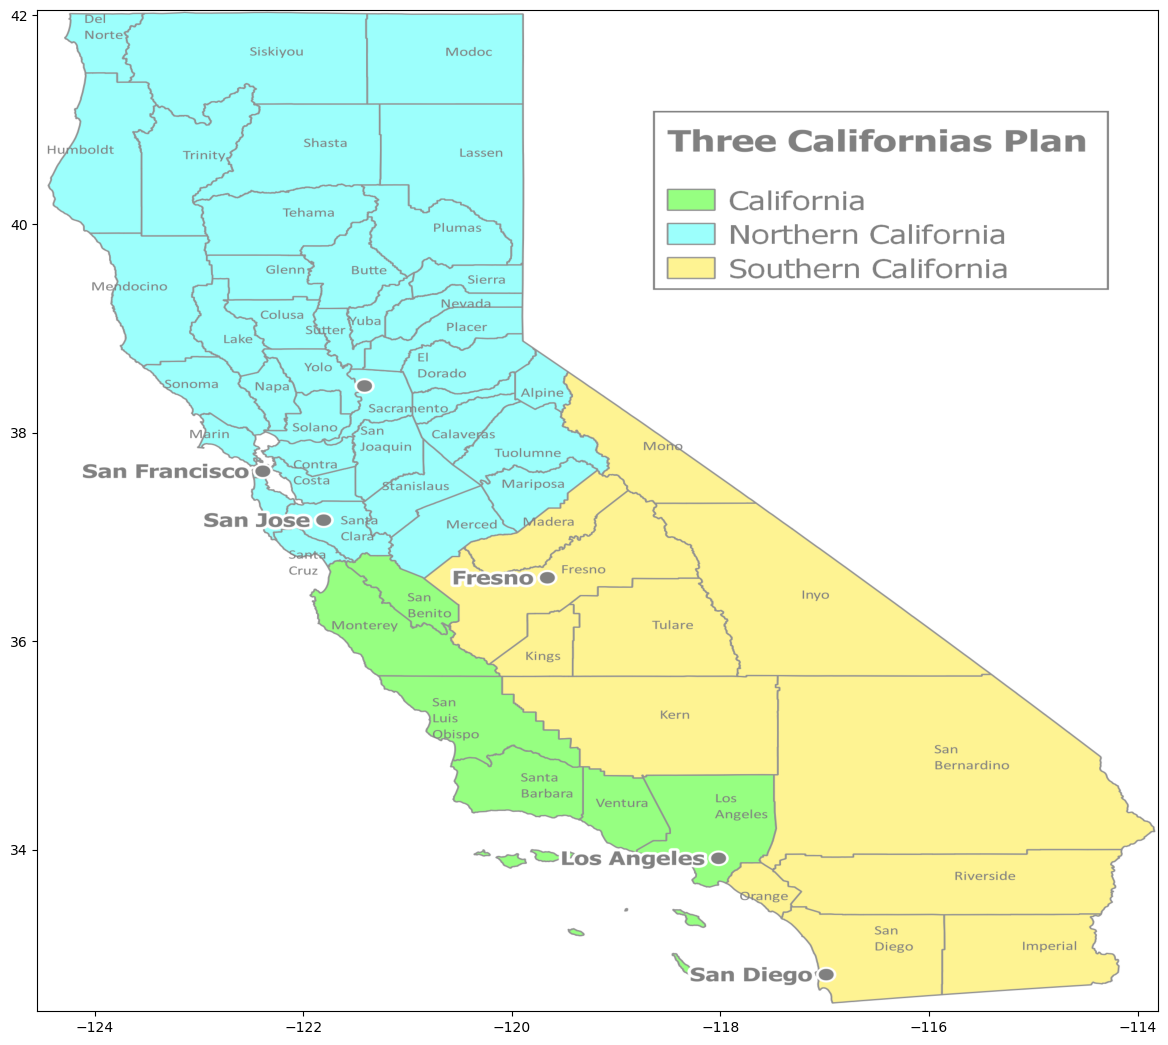

In [12]:
url = 'https://www.centerforpolitics.org/crystalball/content/images//GVS2018042602-map1.png'
response = requests.get(url)
california_map = Image.open(BytesIO(response.content))

plt.figure(figsize=(20,13))
 
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.show()

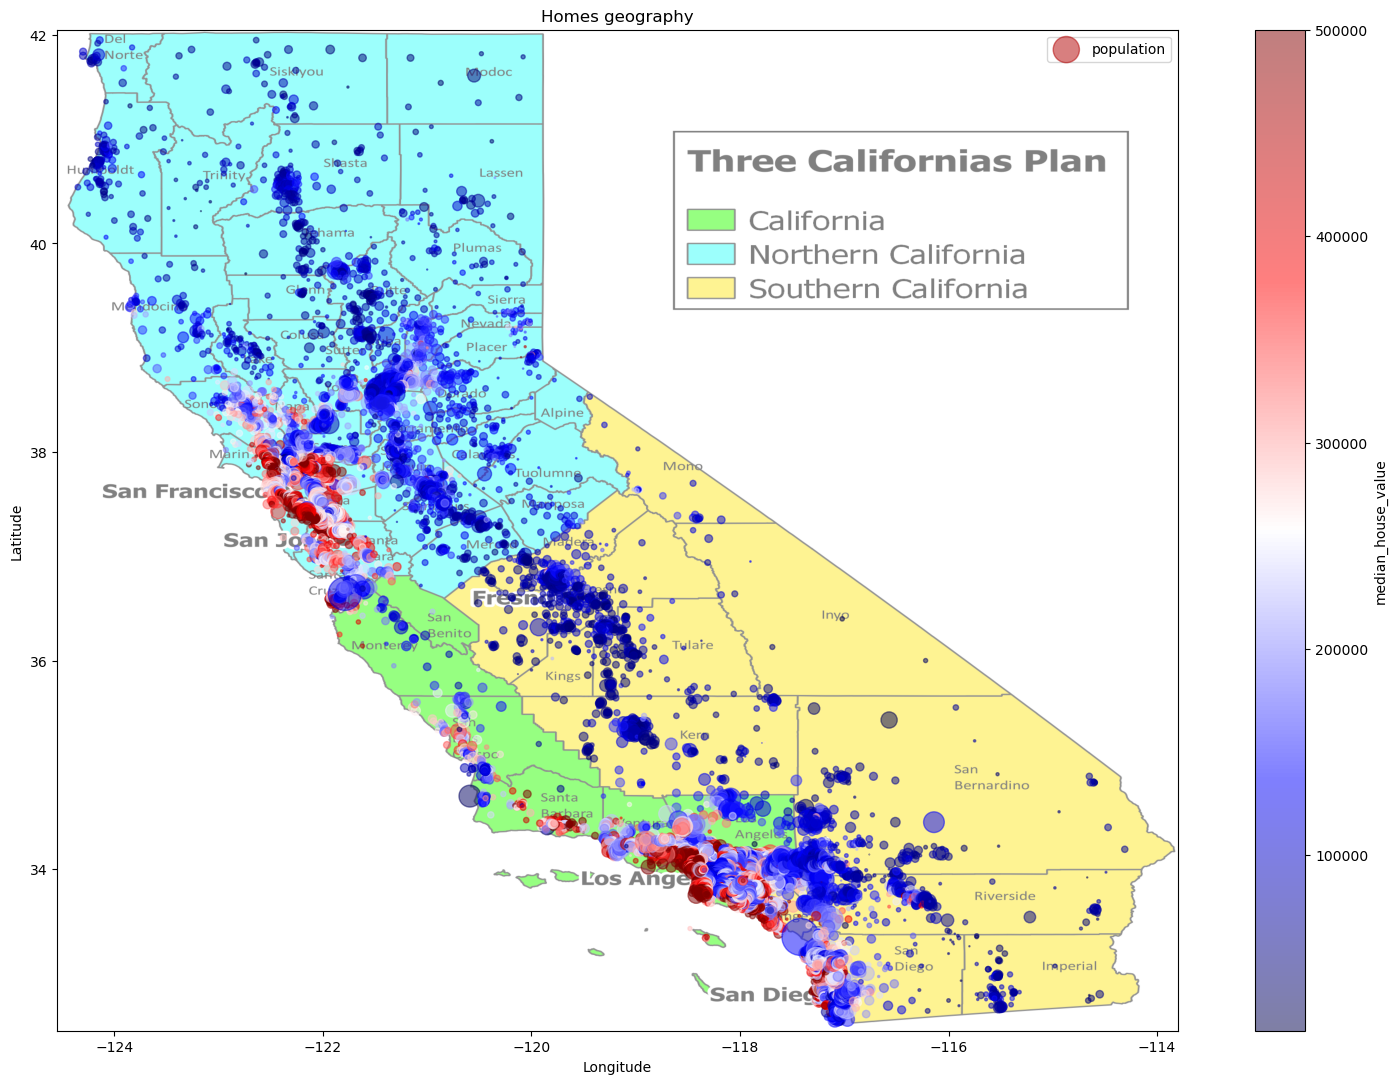

In [13]:
california_housing_df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
        s=california_housing_df['population'] / 50, label='population', c='median_house_value', 
        cmap=plt.get_cmap('seismic'), figsize=(20,13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")
plt.legend() 
plt.show()

<Axes: xlabel='median_house_value', ylabel='median_income'>

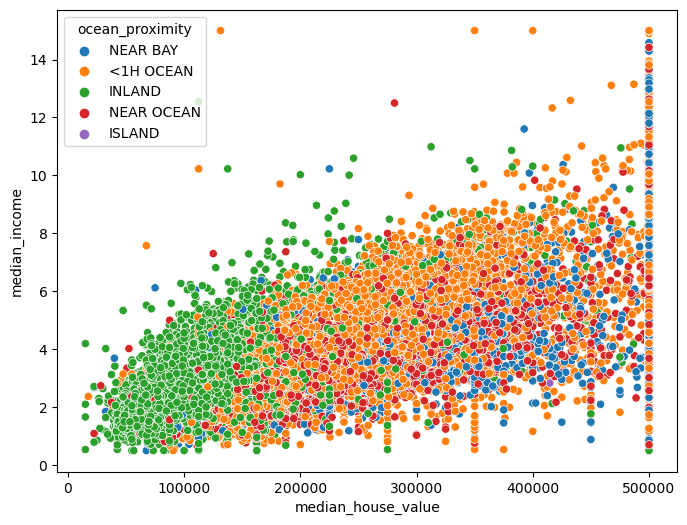

In [14]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=california_housing_df,x='median_house_value',y='median_income',hue='ocean_proximity')

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

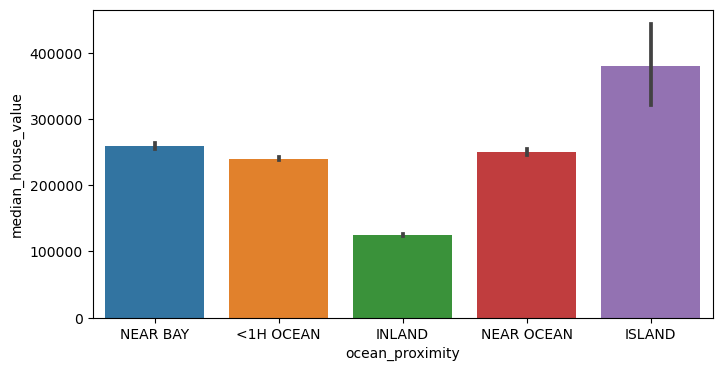

In [15]:
plt.figure(figsize=(8,4))
sns.barplot(data=california_housing_df,x='ocean_proximity',y='median_house_value')

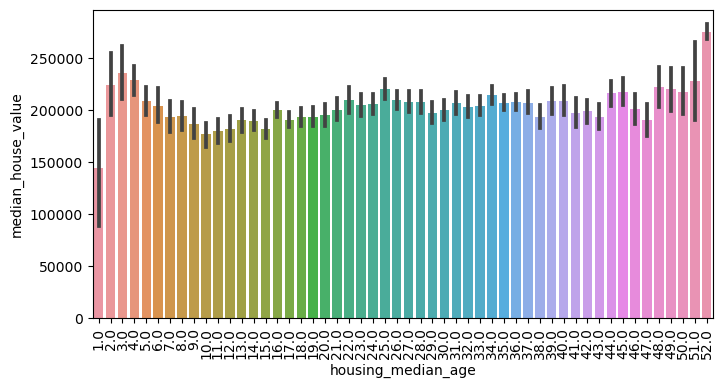

In [16]:
plt.figure(figsize=(8,4))
sns.barplot(data=california_housing_df,x='housing_median_age',y='median_house_value')

plt.xticks(rotation=90)
plt.show()

In [17]:
california_housing_df[california_housing_df['housing_median_age']==1]['median_house_value']

3130     141700.0
12286     55000.0
18972    191300.0
19536    189200.0
Name: median_house_value, dtype: float64

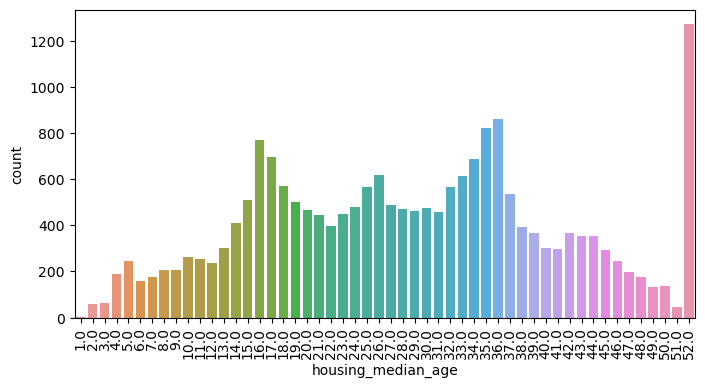

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(data=california_housing_df,x='housing_median_age')
plt.xticks(rotation=90)
plt.show()

# ✮Missing Values

In [19]:
pd.DataFrame(california_housing_df.isna().sum().sort_values(ascending=False),columns=['Null Values'])

Null Values
total_bedrooms              207
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0

In [20]:
numerical_features.corr()['total_bedrooms'].sort_values(ascending=False)

total_bedrooms        1.000000
households            0.979728
total_rooms           0.930380
population            0.877747
longitude             0.069608
median_house_value    0.049686
median_income        -0.007723
latitude             -0.066983
housing_median_age   -0.320451
Name: total_bedrooms, dtype: float64

In [21]:
california_housing_df['total_bedrooms']=california_housing_df['total_bedrooms'].fillna(california_housing_df['households'])

In [22]:
california_housing_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# ✮Outliers

## IQR

Outliers Visualization with Boxplot

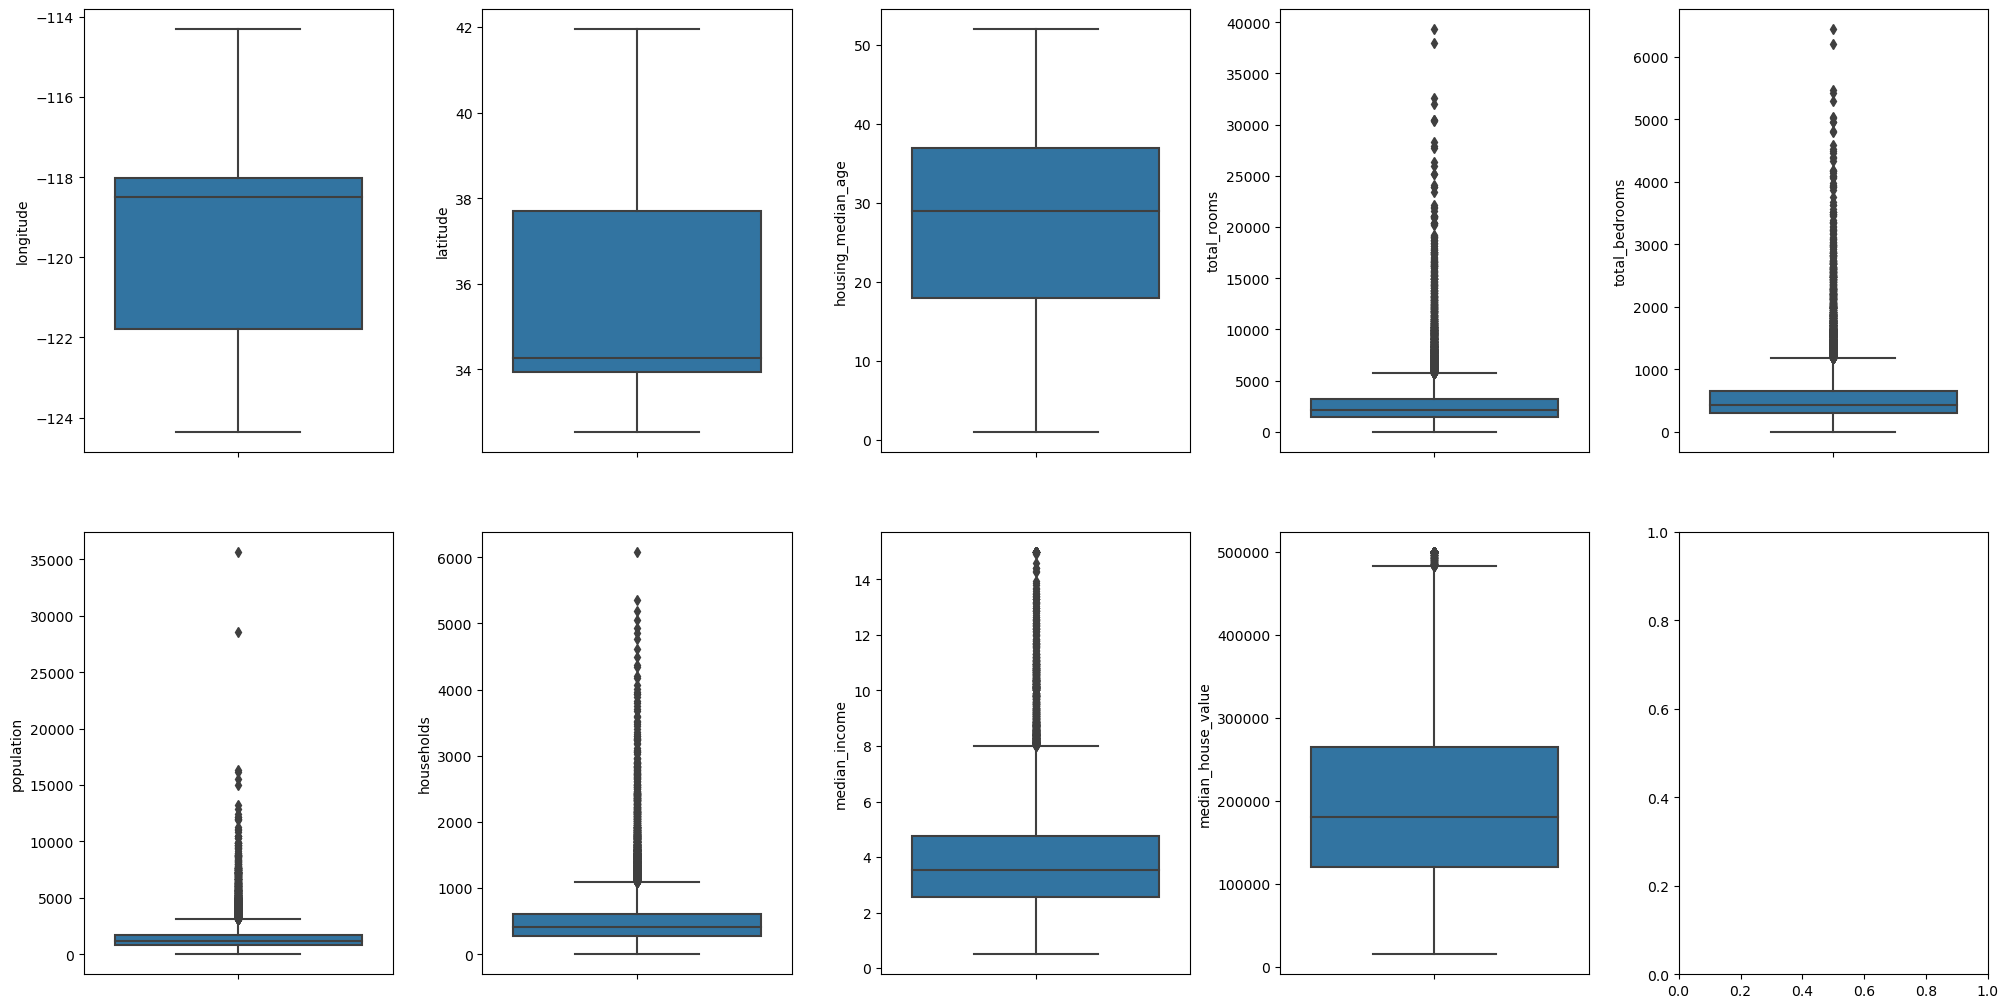

In [23]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in numerical_features.items():
    sns.boxplot(y=k, data=numerical_features, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Calculate the percentage of outlier with IQR 

In [24]:
for k, v in numerical_features.items():
    #IQR
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
    
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        min_boxplot=q1 - 1.5 * iqr
        max_boxplot=q3 + 1.5 * iqr
        
        if(min_boxplot<v.min()):
            min_boxplot=v.min()
        if(max_boxplot>v.max()):
            max_boxplot=v.max()
        
        perc = np.shape(v_col)[0] * 100.0 / np.shape(numerical_features)[0]
        
        num_o=v_col.count()
        
        if(num_o != 0):
            print("Column %s outliers = %.2f%%\nNumber of outliers = %i\nlowerBound : %i\nupperBound : %i\n" 
                  % (k, perc,num_o,min_boxplot,max_boxplot))
            


Column total_rooms outliers = 6.24%
Number of outliers = 1287
lowerBound : 2
upperBound : 5698

Column total_bedrooms outliers = 6.16%
Number of outliers = 1271
lowerBound : 1
upperBound : 1173

Column population outliers = 5.80%
Number of outliers = 1198
lowerBound : 3
upperBound : 3132

Column households outliers = 5.91%
Number of outliers = 1220
lowerBound : 1
upperBound : 1092

Column median_income outliers = 3.30%
Number of outliers = 681
lowerBound : 0
upperBound : 8

Column median_house_value outliers = 5.19%
Number of outliers = 1071
lowerBound : 14999
upperBound : 482412



In [25]:
# IQR 

def iqr(df,feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    
    outliers = df[(df[feature] <= q1 - 1.5 * iqr) | (df[feature] >= q3 + 1.5 * iqr)]
    
    return np.array(outliers.index)

In [26]:
iqr(california_housing_df,'households')

array([    1,    95,    96, ..., 20544, 20563, 20629])

## Z Score

In [27]:
# Z score
def zscore(df,feature):
    z = np.abs(stats.zscore(df[feature]))
    # Position of the outlier
    outliers=(np.where(z > 3)) #threshold = 3
    return np.array(outliers)

In [28]:
index=zscore(california_housing_df,'median_income')
california_housing_df['median_income'].iloc[index[0]].min()

9.5823

In [29]:
for i in numerical_features.columns:
        
        perc = zscore(california_housing_df,i).shape[1] * 100.0 / np.shape(numerical_features)[0]
        
        num_o=zscore(california_housing_df,i).shape[1]
        
        if(num_o != 0):
            print("Column %s outliers = %.2f%%\nNumber of outliers = %i\n" % (i, perc,num_o))

Column total_rooms outliers = 1.81%
Number of outliers = 373

Column total_bedrooms outliers = 1.80%
Number of outliers = 371

Column population outliers = 1.66%
Number of outliers = 342

Column households outliers = 1.76%
Number of outliers = 363

Column median_income outliers = 1.67%
Number of outliers = 345



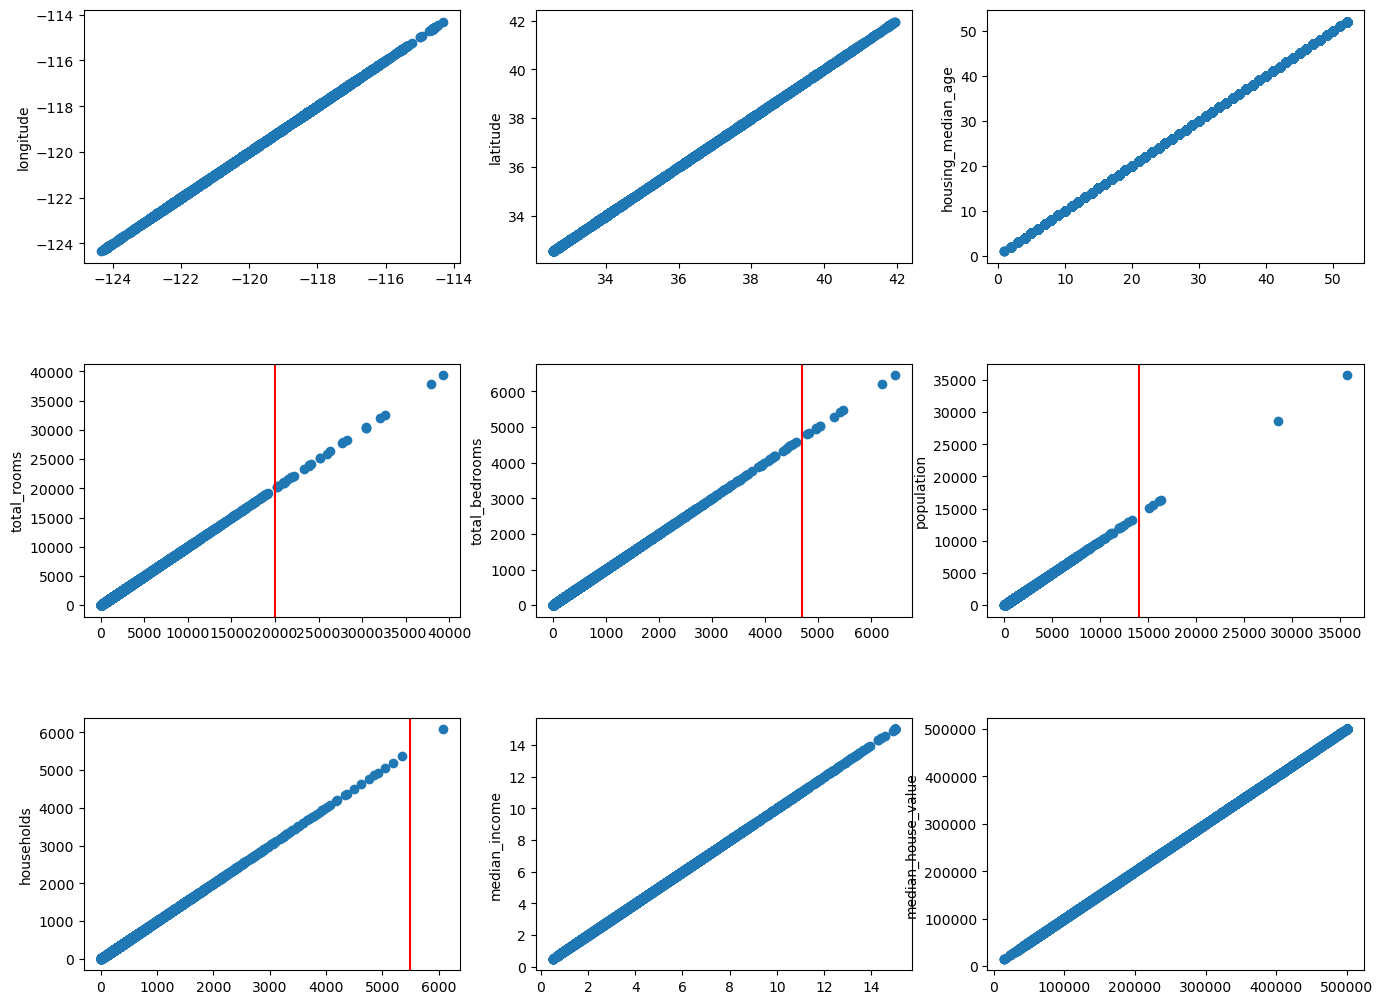

In [30]:
fig, ax= plt.subplots(nrows=3,ncols=3)
fig.subplots_adjust(wspace=0.2, hspace=0.4,right=5,left=3,top=3,bottom=1)
        
        
a=[0,0,0,1,1,1,2,2,2]
b=[0,1,2,0,1,2,0,1,2]
counter=0
for index in numerical_features.columns:
    ax[a[counter],b[counter]].scatter(x=numerical_features[index],y=numerical_features[index])
    ax[a[counter],b[counter]].set_ylabel(index)
    counter+=1
    
    
ax[1,0].axvline(x=20000,color='r')
ax[1,1].axvline(x=4700,color='r')
ax[1,2].axvline(x=14000,color='r')

ax[2,0].axvline(x=5500,color='r')

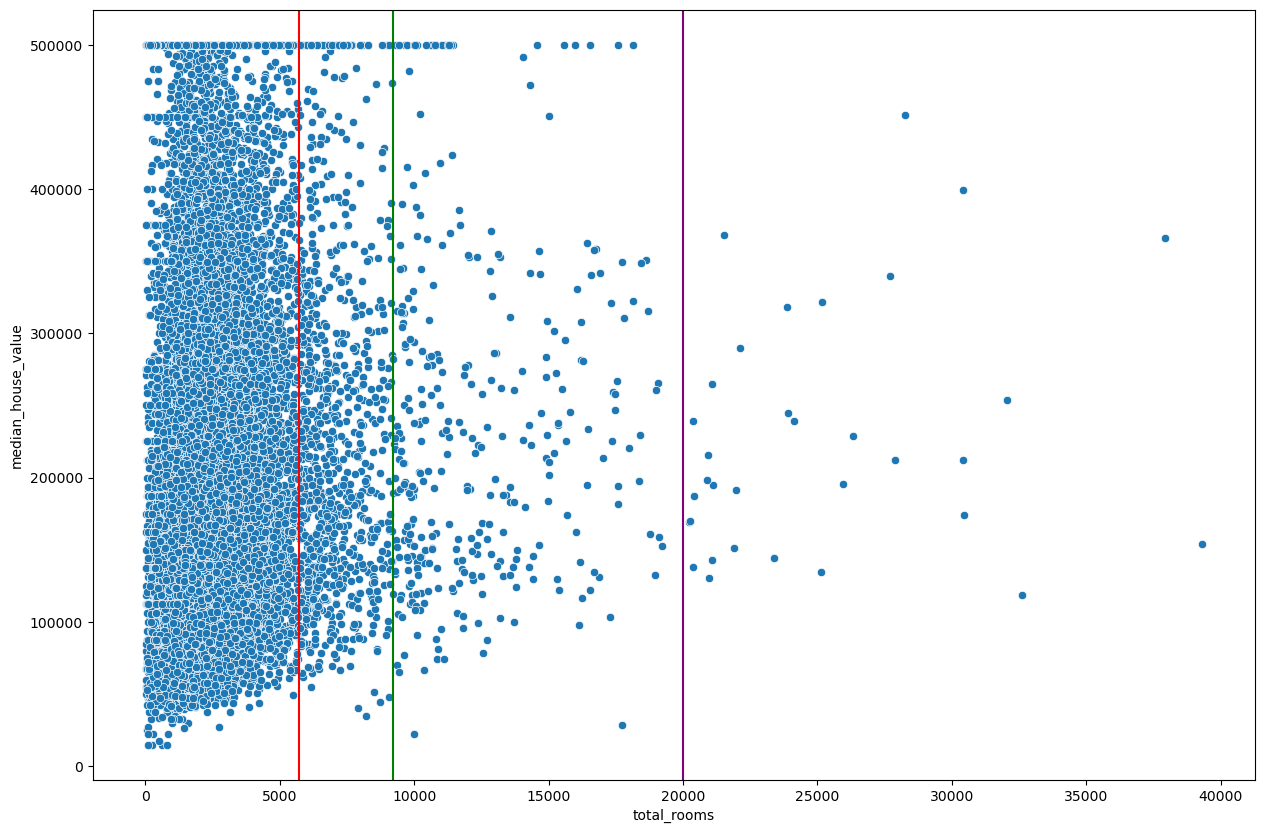

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=california_housing_df,x='total_rooms',y='median_house_value')

plt.axvline(5698,color='r') #iqr
plt.axvline(x=20000,color='purple')#scatterplot
plt.axvline(x=9197,color='green')#z score

plt.show()

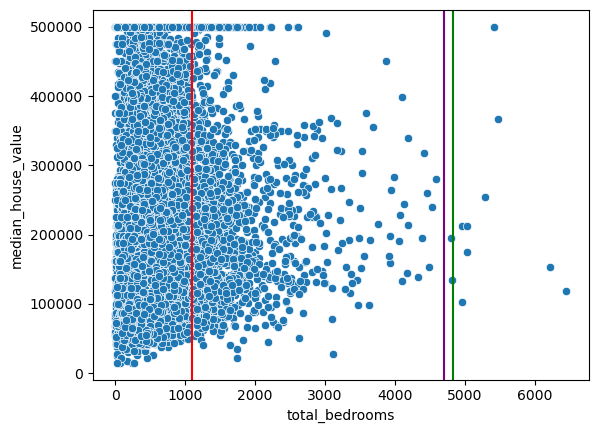

In [32]:
sns.scatterplot(data=california_housing_df,x='total_bedrooms',y='median_house_value')

plt.axvline(1092,color='r') #iqr
plt.axvline(x=4700,color='purple')#scatterplot
plt.axvline(x=4826,color='green')#z score
plt.show()

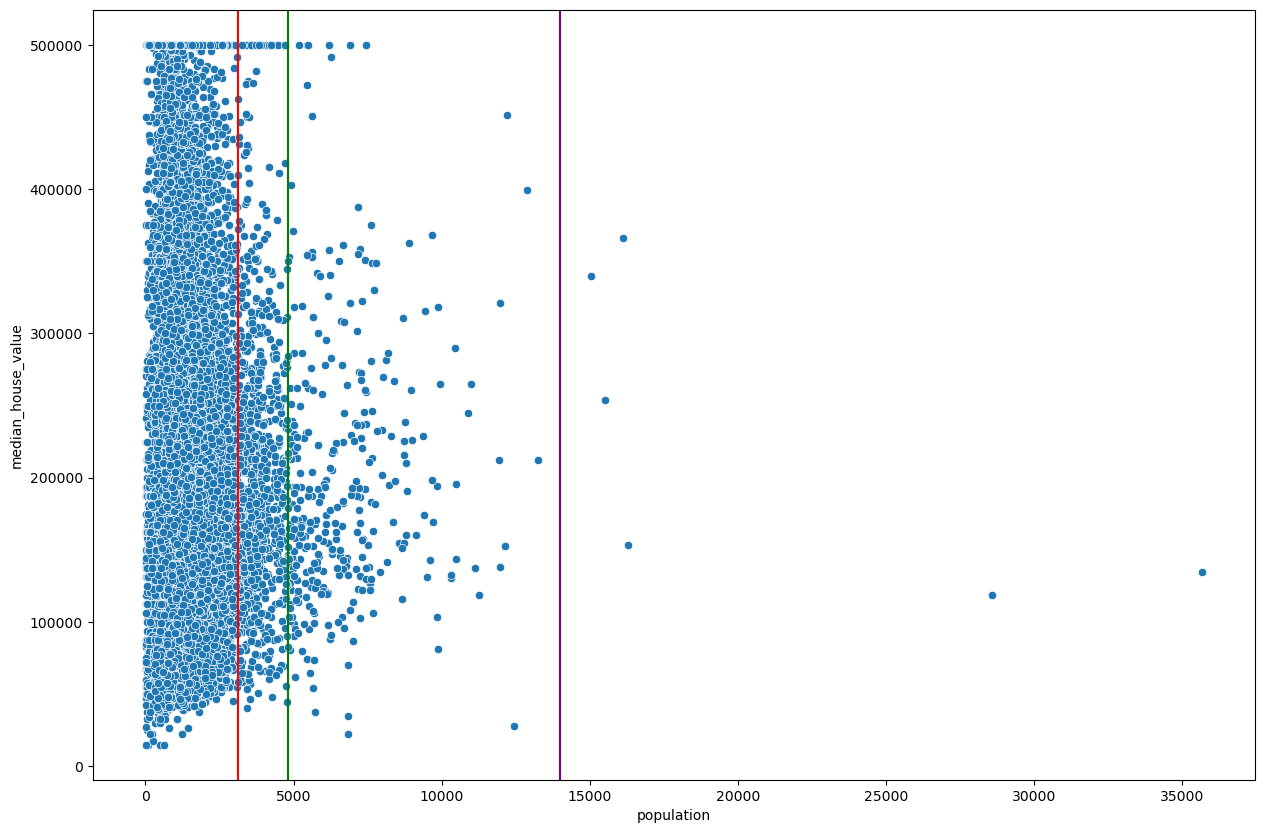

In [33]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=california_housing_df,x='population',y='median_house_value')

plt.axvline(3132,color='r') #iqr
plt.axvline(x=14000,color='purple')#scatterplot
plt.axvline(x=4826,color='green')#z score

plt.show()

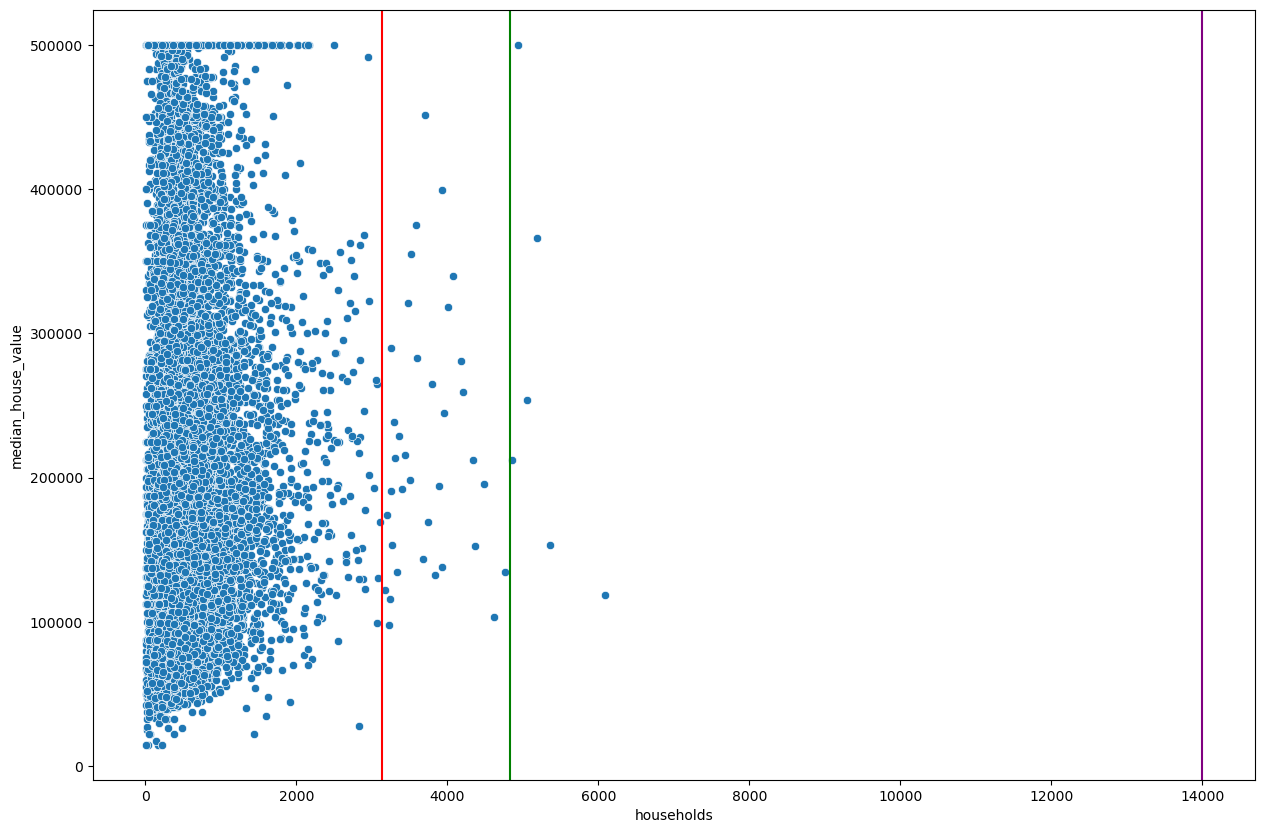

In [34]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=california_housing_df,x='households',y='median_house_value')

plt.axvline(3132,color='r') #iqr
plt.axvline(x=14000,color='purple')#scatterplot
plt.axvline(x=4826,color='green')#z score

plt.show()

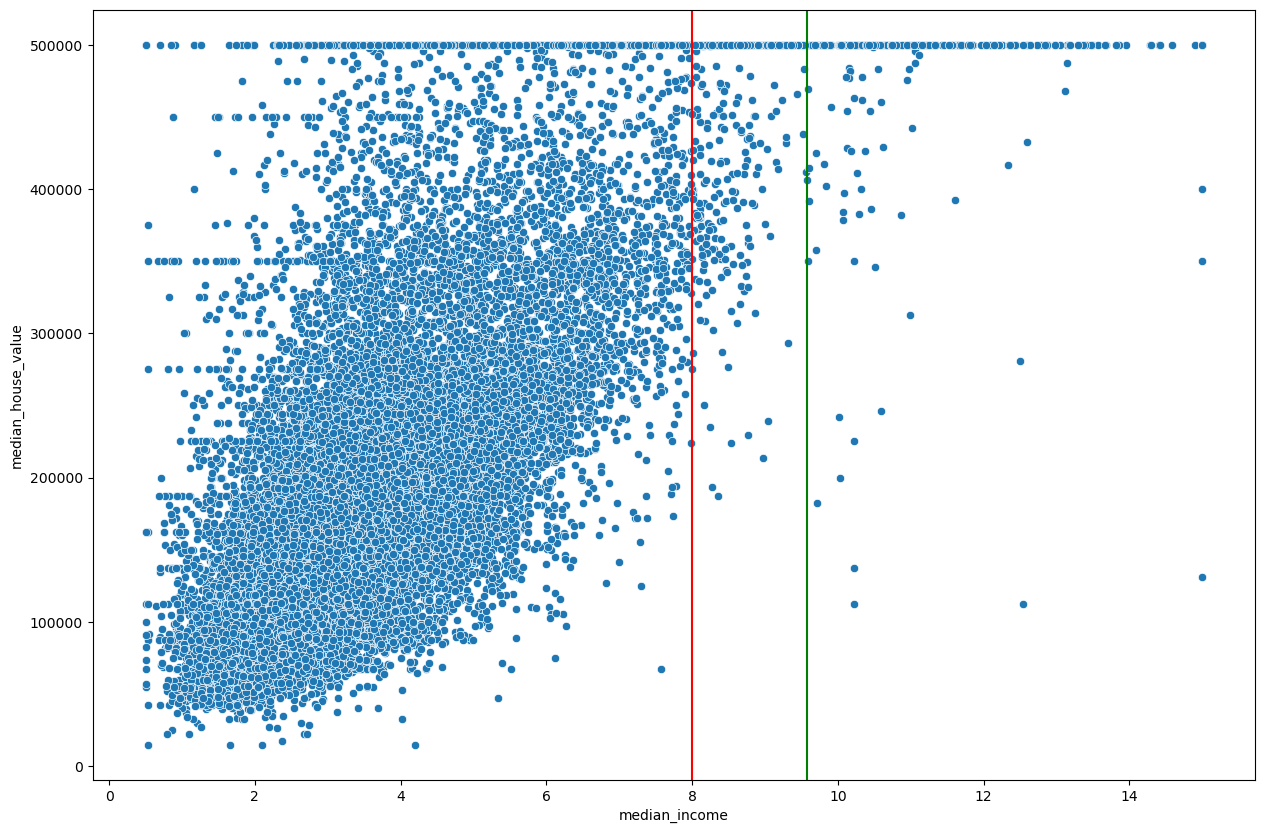

In [35]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=california_housing_df,x='median_income',y='median_house_value')

plt.axvline(8,color='r') #iqr
plt.axvline(x=9.5823,color='green')#z score

plt.show()

In [36]:
total_room=np.array(california_housing_df.iloc[zscore(california_housing_df,'total_rooms')[0]].index)
california_housing_df=california_housing_df.drop(index=total_room,axis=0)

In [37]:
total_bedroom=np.array(california_housing_df.iloc[zscore(california_housing_df,'total_bedrooms')[0]].index)
california_housing_df=california_housing_df.drop(index=total_bedroom,axis=0)

In [38]:
population=np.array(california_housing_df.iloc[zscore(california_housing_df,'population')[0]].index)
california_housing_df=california_housing_df.drop(index=population,axis=0)

In [39]:
households=np.array(california_housing_df.iloc[zscore(california_housing_df,'households')[0]].index)
california_housing_df=california_housing_df.drop(index=households,axis=0)

In [40]:
income=np.array(california_housing_df.iloc[zscore(california_housing_df,'median_income')[0]].index)
california_housing_df=california_housing_df.drop(index=income,axis=0)

In [41]:
california_housing_df.groupby("ocean_proximity").size()
california_housing_df["ocean_proximity"]= california_housing_df["ocean_proximity"].map({"<1H OCEAN" : 0, "INLAND":1, "ISLAND":2, "NEAR BAY":3, "NEAR OCEAN":4})


In [42]:
california_housing_df.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0                3  
1      2401.0      1138.0         8.3014            358500.0                3  
2       496.0       177.0         7.2574            352100.0                3  
3       558.0       219.0         5.6431            341300.0                3  
4       565.0       259.0         3.8462            342200.0                3

# ✮ Determine the Features & Target Variable

In [43]:
X=california_housing_df.drop('median_house_value',axis=1)
y=california_housing_df['median_house_value']

# ✮ Split the Dataset to Train & Test

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# ✮ Train the Model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model= LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

# ✮ Predicting Test Data

In [49]:
y_pred=model.predict(X_test)

In [50]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred }).head(5)

Y_Test         Y_Pred
3759   174200.0  190336.672491
9838   234600.0  244933.553361
8895   450000.0  305705.933871
16207   45000.0  104874.027250
1671   155700.0  258534.228323

# ✮ Evalutaing the Model

In [51]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

Metrics
MAE   4.896197e+04
MSE   4.477383e+09
RMSE  6.691325e+04